In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neural_exploration import *
sns.set()

### Bandit settings

In [2]:
T = int(2e2)
n_arms = 4
n_features = 16
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 2

### NeuralUCB on linear rewards

In [3]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)

In [4]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=64,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      learning_rate=0.01,
                      batch_size=100,
                      epochs=5,
                      use_cuda=False,
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

  0%|          | 0/200 [00:00<?, ?it/s, % optimal arm=0, total regret=0]/home/sauxpa/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 200/200 [00:06<00:00, 30.84it/s, total regret=609, % optimal arm=82.00%]


### Sublinear regret growth : the bandit problem is solved efficiently

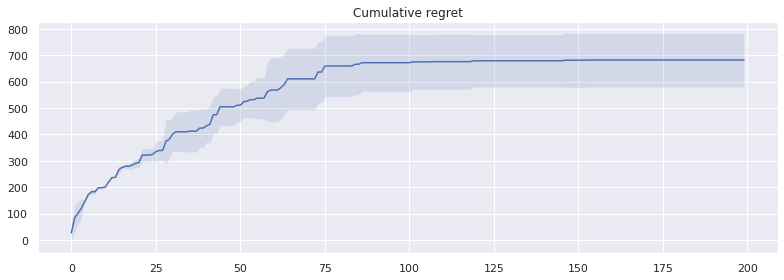

In [5]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

### NeuralUCB on nonlinear rewards

In [6]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)**2

In [7]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=64,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      learning_rate=0.01,
                      batch_size=100,
                      epochs=10,
                      use_cuda=False,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 200/200 [00:06<00:00, 32.44it/s, total regret=869, % optimal arm=54.50%]


### Sublinear regret growth : the bandit problem is solved efficiently (even though the reward is nonlinear!)

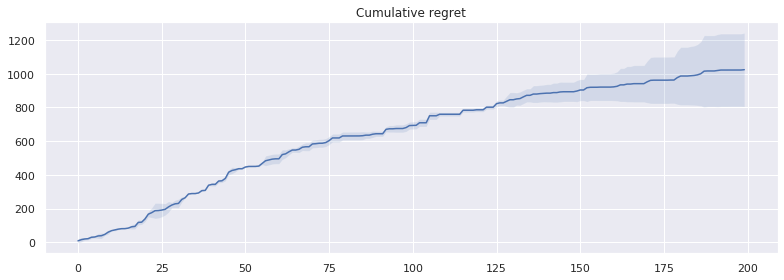

In [8]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()